In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv("RHdata.data", delim_whitespace=True, header=None)
labels_df = pd.read_csv("RHlabel.labels", delim_whitespace=True, header=None, names=['Label'])
combined_df = pd.concat([data_df, labels_df], axis=1)
combined_df


C:\Users\arman.manoukyan\AppData\Local\Temp\ipykernel_27056\1341061729.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_df = pd.read_csv("RHdata.data", delim_whitespace=True, header=None)
C:\Users\arman.manoukyan\AppData\Local\Temp\ipykernel_27056\1341061729.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  labels_df = pd.read_csv("RHlabel.labels", delim_whitespace=True, header=None, names=['Label'])


0         1         2         3         4         5         6  \
0       0.397174  0.347518  0.294057  0.506484  0.115967  0.770536  0.659893   
1       0.275030  0.075388  0.610592  0.954931  0.274069  0.190202  0.001299   
2       0.233156  0.889909  0.038327  0.592379  0.655174  0.119839  0.652477   
3       0.277937  0.340915  0.265790  0.116670  0.136830  0.546089  0.494619   
4       0.254909  0.777916  0.225022  0.983103  0.803619  0.836315  0.163104   
...          ...       ...       ...       ...       ...       ...       ...   
199995  0.726745  0.954611  0.738764  0.601116  0.141100  0.541834  0.716674   
199996  0.612227  0.599349  0.572385  0.431870  0.581491  0.146335  0.935508   
199997  0.438512  0.138679  0.127773  0.219340  0.921165  0.201063  0.552331   
199998  0.255387  0.824618  0.173987  0.722184  0.076014  0.906654  0.921876   
199999  0.895205  0.464303  0.391977  0.946089  0.677879  0.163924  0.150782   

               7         8         9  Label  
0       0.156747  0.378202  0.139763      0  
1       0.683527  0.486260  0.487515      0  
2       0.984323  0.206738  0.374650      1  
3       0.015384  0.358995  0.242478      0  
4       0.637497  0.008760  0.631190      0  
...          ...       ...       ...    ...  
199995  0.558802  0.942151  0.879320      1  
199996  0.477917  0.362592  0.739811      1  
199997  0.781760  0.200440  0.851947      1  
199998  0.205363  0.077302  0.352550      0  
199999  0.001564  0.268755  0.896265      1  

[200000 rows x 11 columns]

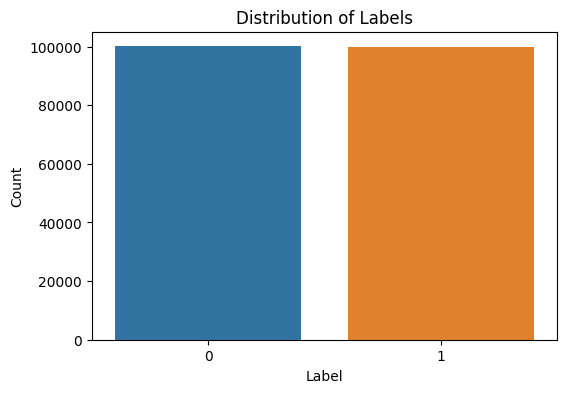

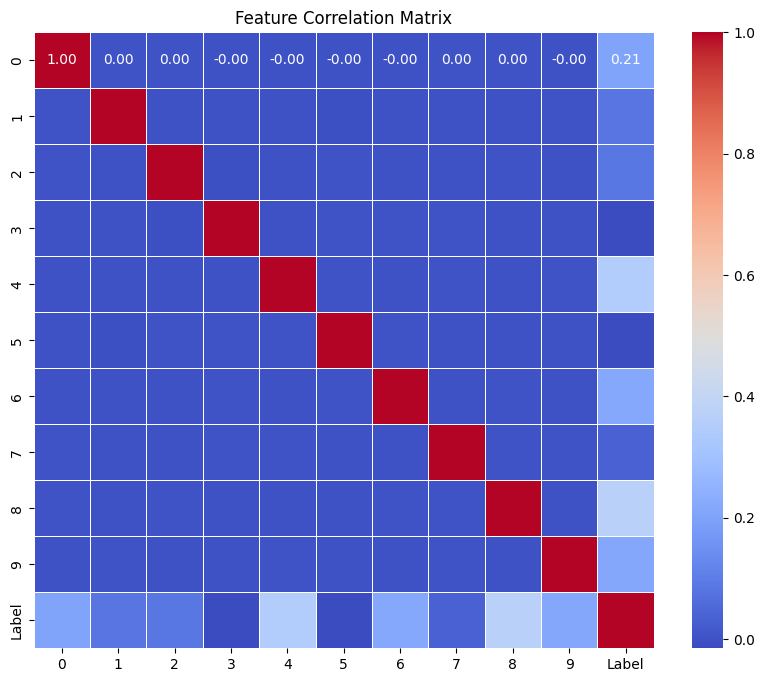

c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

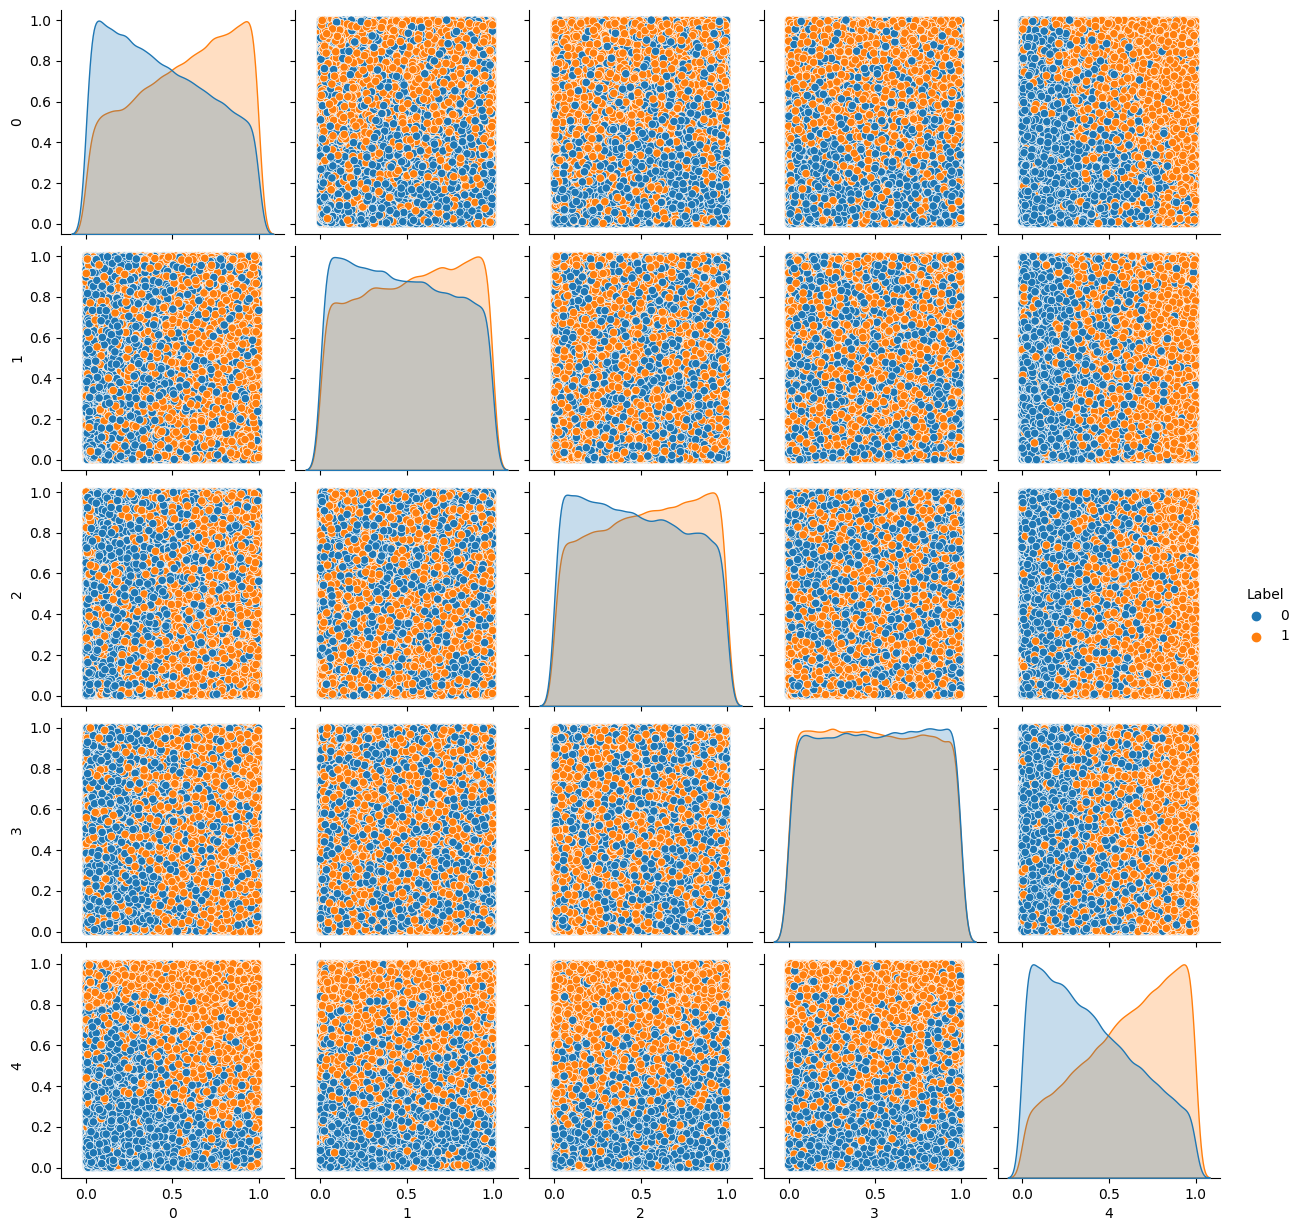

In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(x=combined_df['Label'])
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(10, 8))
corr_matrix = combined_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

sns.pairplot(combined_df.iloc[:, :5].join(combined_df['Label']), hue="Label")
plt.show()


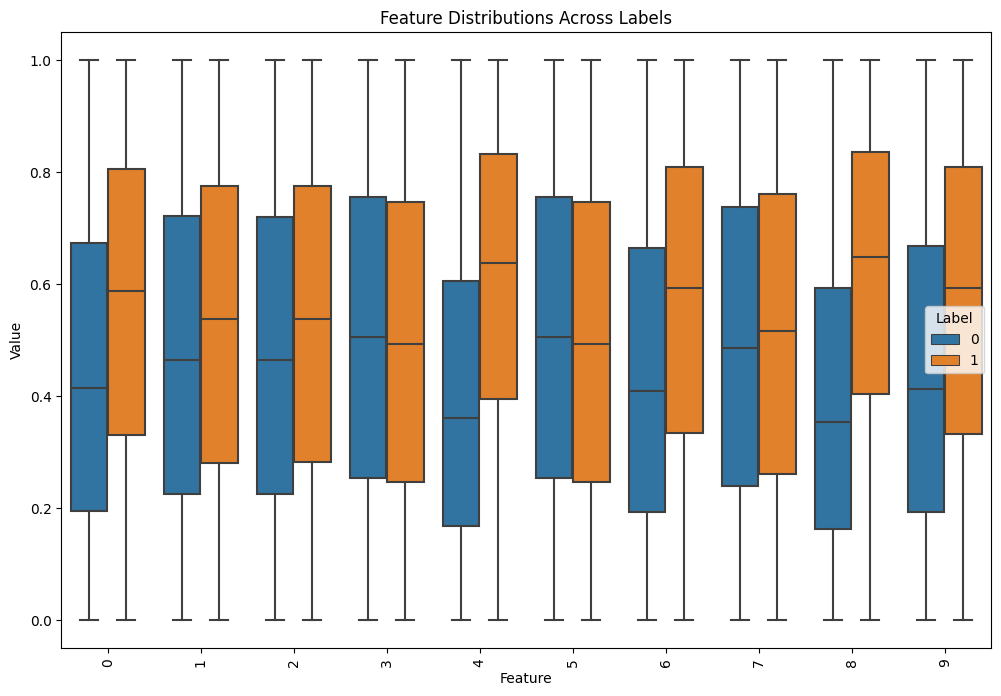

In [ ]:
plt.figure(figsize=(12, 8))
melted_df = combined_df.melt(id_vars=["Label"], var_name="Feature", value_name="Value")
sns.boxplot(x="Feature", y="Value", hue="Label", data=melted_df)
plt.xticks(rotation=90)
plt.title("Feature Distributions Across Labels")
plt.show()


<Figure size 1200x1000 with 0 Axes>

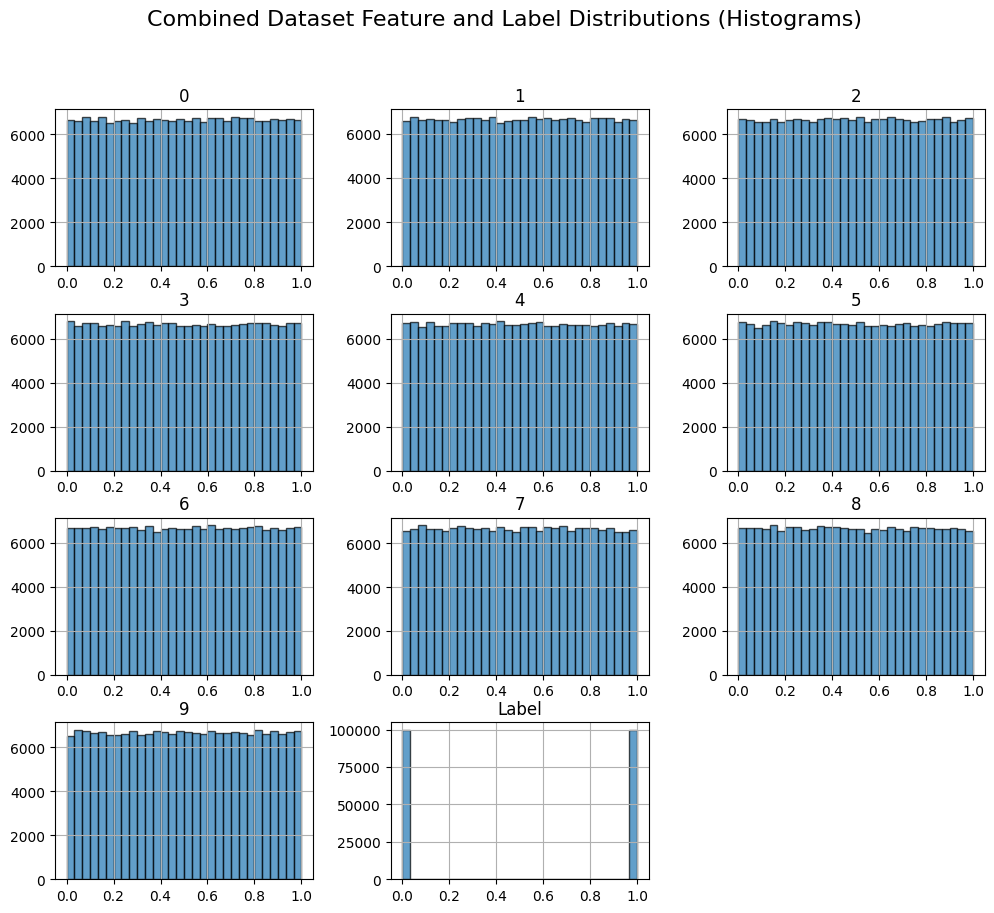

In [13]:
# Generate histograms for the combined dataset (including labels)
plt.figure(figsize=(12, 10))
combined_df.hist(bins=30, edgecolor='black', figsize=(12, 10), alpha=0.7)
plt.suptitle("Combined Dataset Feature and Label Distributions (Histograms)", fontsize=16)
plt.show()


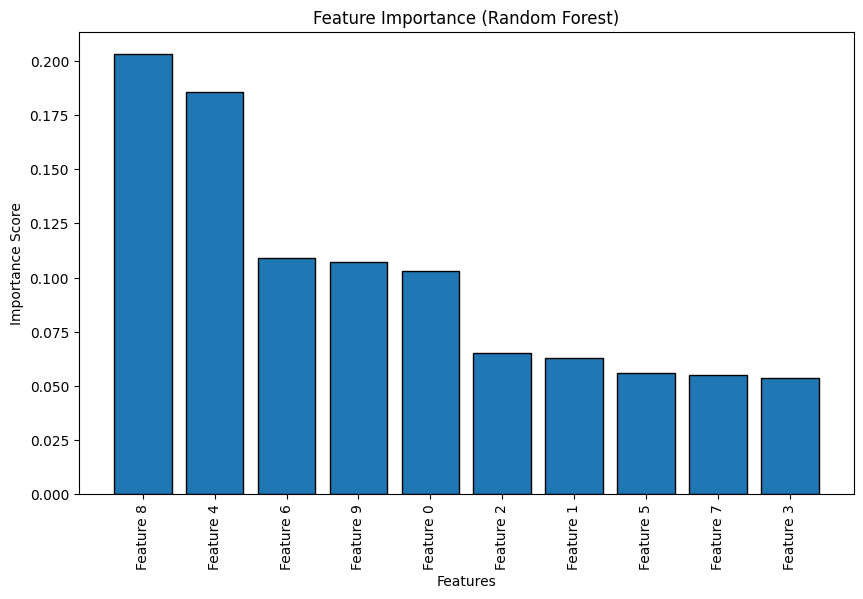

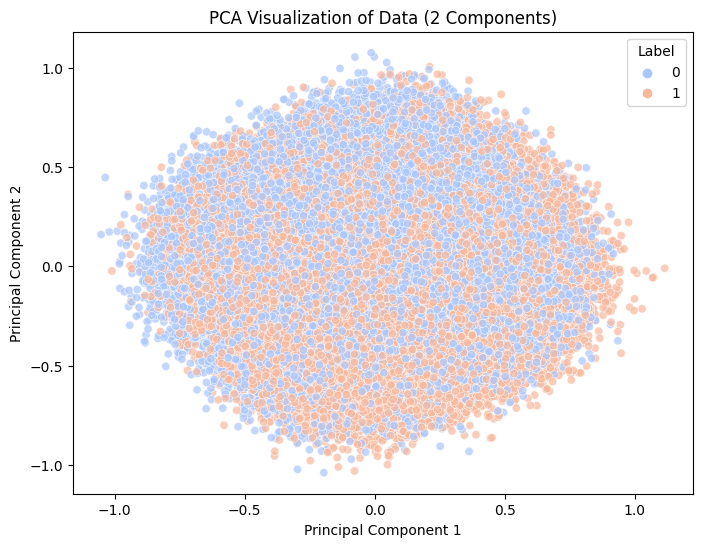

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import numpy as np

# Separate features and labels
X = combined_df.iloc[:, :-1]  # Features
y = combined_df['Label']      # Labels

# Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances = rf.feature_importances_

# Sort feature importances
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [f"Feature {i}" for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances, edgecolor='black')
plt.xticks(rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# PCA for Dimensionality Reduction (to visualize in 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title("PCA Visualization of Data (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


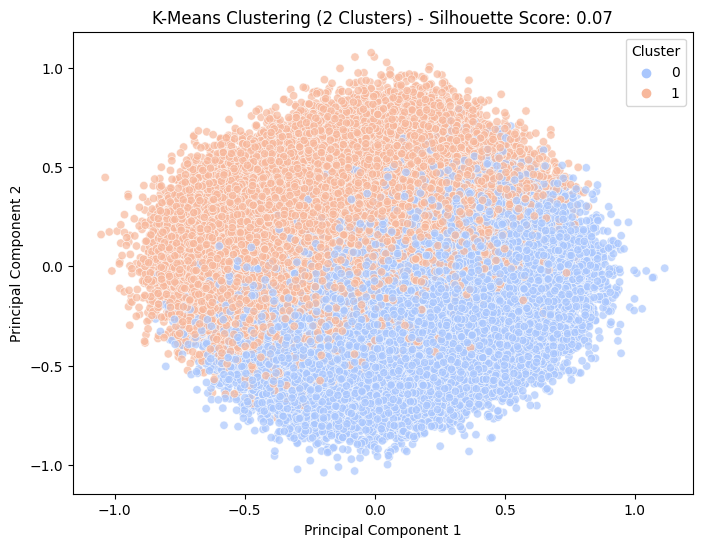

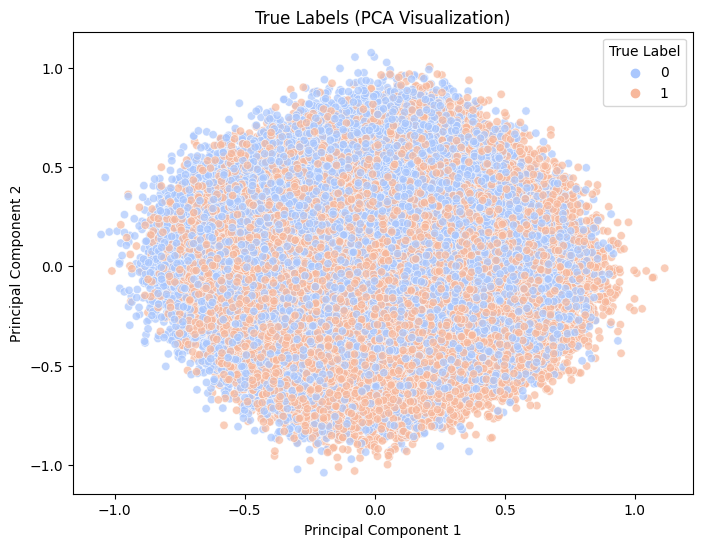

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Compute Silhouette Score
silhouette_avg = silhouette_score(X, clusters)

# Scatter plot of PCA components with Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='coolwarm', alpha=0.7)
plt.title(f"K-Means Clustering (2 Clusters) - Silhouette Score: {silhouette_avg:.2f}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="best")
plt.show()

# Compare Clusters with True Labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title("True Labels (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="True Label", loc="best")
plt.show()


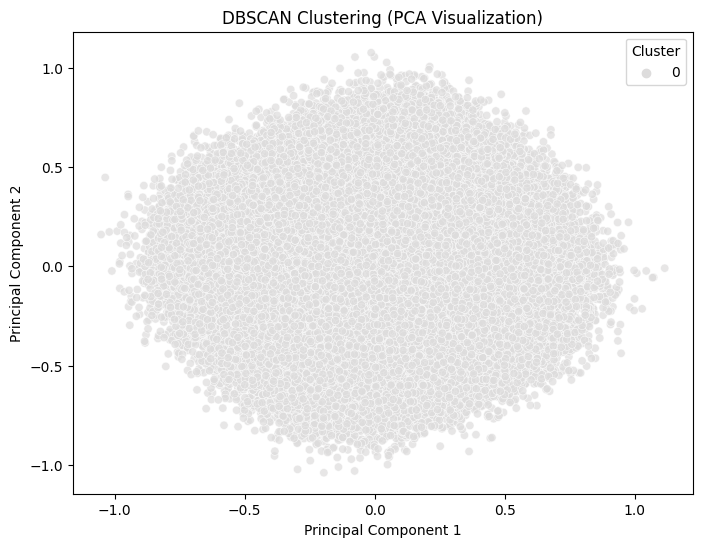

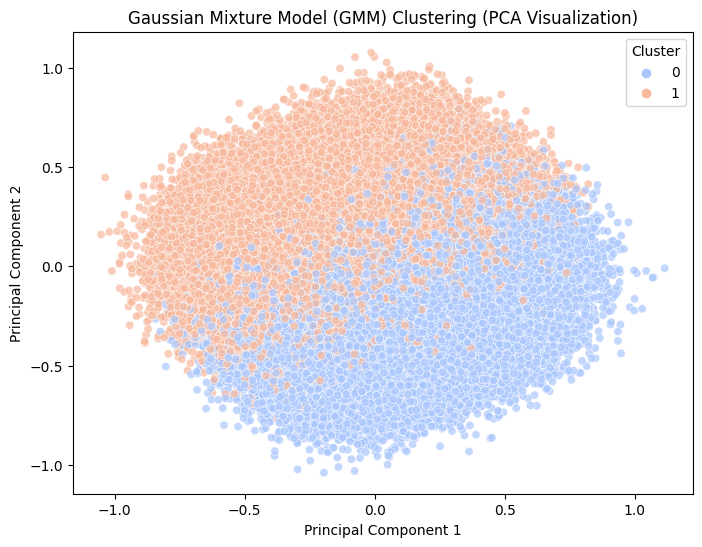

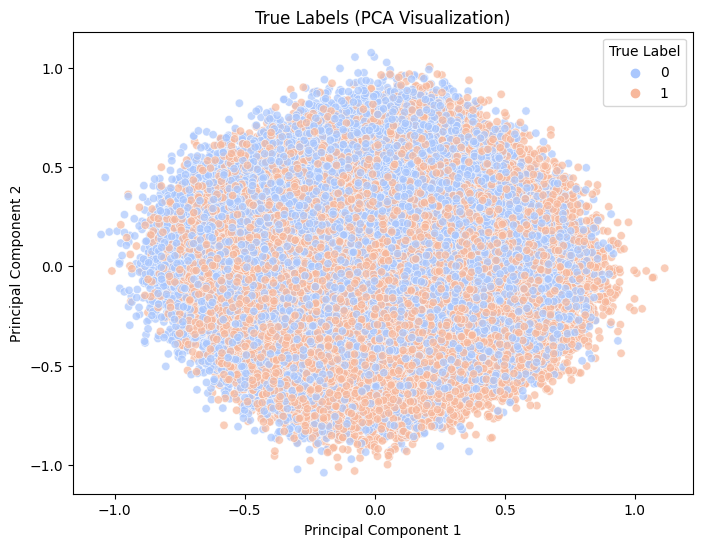

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X)

# Apply Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_clusters = gmm.fit_predict(X)

# Plot DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_clusters, palette='coolwarm', alpha=0.7)
plt.title("DBSCAN Clustering (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="best")
plt.show()

# Plot GMM Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_clusters, palette='coolwarm', alpha=0.7)
plt.title("Gaussian Mixture Model (GMM) Clustering (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="best")
plt.show()

# Compare with True Labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title("True Labels (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="True Label", loc="best")
plt.show()


Accuracy: 0.81

Confusion Matrix:
[[16171  3763]
 [ 4033 16033]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     19934
           1       0.81      0.80      0.80     20066

    accuracy                           0.81     40000
   macro avg       0.81      0.81      0.81     40000
weighted avg       0.81      0.81      0.81     40000



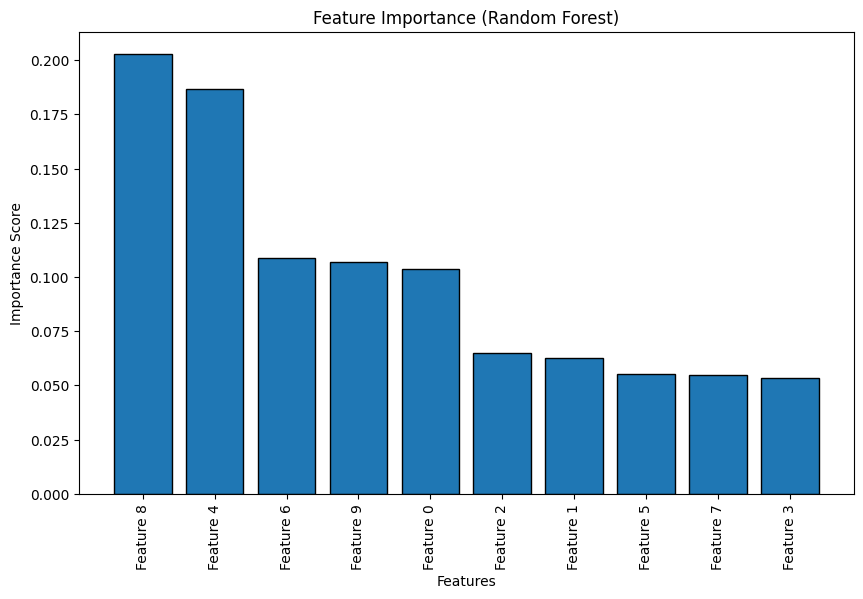

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Feature importance analysis
feature_importances = rf_classifier.feature_importances_

# Sort feature importances
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [f"Feature {i}" for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances, edgecolor='black')
plt.xticks(rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model as an alternative
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = log_reg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

# Display results
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_logreg)
print("\nClassification Report:")
print(class_report_logreg)


Logistic Regression Accuracy: 0.81

Confusion Matrix:
[[16121  3813]
 [ 3819 16247]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     19934
           1       0.81      0.81      0.81     20066

    accuracy                           0.81     40000
   macro avg       0.81      0.81      0.81     40000
weighted avg       0.81      0.81      0.81     40000



In [19]:
# Check for missing values
missing_values = combined_df.isnull().sum()

# Check data types
data_types = combined_df.dtypes

# Check class distribution
label_distribution = combined_df['Label'].value_counts()

# Display findings
missing_values, data_types, label_distribution


(0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        0
 8        0
 9        0
 Label    0
 dtype: int64,
 0        float64
 1        float64
 2        float64
 3        float64
 4        float64
 5        float64
 6        float64
 7        float64
 8        float64
 9        float64
 Label      int64
 dtype: object,
 Label
 0    100065
 1     99935
 Name: count, dtype: int64)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select only the most important features based on previous analysis
selected_features = [8, 4, 6, 9, 0]  # Top features based on importance
X_selected = X.iloc[:, selected_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Display results
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_gb)
print("\nClassification Report:")
print(class_report_gb)


Gradient Boosting Accuracy: 0.80

Confusion Matrix:
[[16028  3906]
 [ 3936 16130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     19934
           1       0.81      0.80      0.80     20066

    accuracy                           0.80     40000
   macro avg       0.80      0.80      0.80     40000
weighted avg       0.80      0.80      0.80     40000



In [21]:
from sklearn.naive_bayes import GaussianNB

# Train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

# Display results
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_nb)
print("\nClassification Report:")
print(class_report_nb)


Naive Bayes Accuracy: 0.80

Confusion Matrix:
[[16013  3921]
 [ 3938 16128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     19934
           1       0.80      0.80      0.80     20066

    accuracy                           0.80     40000
   macro avg       0.80      0.80      0.80     40000
weighted avg       0.80      0.80      0.80     40000



In [22]:
from xgboost import XGBClassifier

# Train an XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Display results
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(class_report_xgb)


c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:51:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.80

Confusion Matrix:
[[15989  3945]
 [ 4000 16066]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     19934
           1       0.80      0.80      0.80     20066

    accuracy                           0.80     40000
   macro avg       0.80      0.80      0.80     40000
weighted avg       0.80      0.80      0.80     40000



In [24]:
from lightgbm import LGBMClassifier

# Train a LightGBM Classifier as an alternative to XGBoost
lgbm_classifier = LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
lgbm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_classifier.predict(X_test)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
class_report_lgbm = classification_report(y_test, y_pred_lgbm)

# Display results
print(f"LightGBM Accuracy: {accuracy_lgbm:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_lgbm)
print("\nClassification Report:")
print(class_report_lgbm)


[LightGBM] [Info] Number of positive: 79869, number of negative: 80131
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002899 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499181 -> initscore=-0.003275
[LightGBM] [Info] Start training from score -0.003275
LightGBM Accuracy: 0.80

Confusion Matrix:
[[16017  3917]
 [ 4009 16057]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     19934
           1       0.80      0.80      0.80     20066

    accuracy                           0.80     40000
   macro avg       0.80      0.80      0.80     40000
weighted avg       0.80      0.80      0.80     40000



In [27]:
# Correcting the feature names issue for Decision Tree rule extraction
selected_feature_names = [f"Feature {i}" for i in selected_features]

# Extract rules again
tree_rules = export_text(tree_classifier, feature_names=selected_feature_names)

# Display extracted decision rules
print("Extracted Decision Tree Rules:")
print(tree_rules)


Extracted Decision Tree Rules:
|--- Feature 8 <= 0.48
|   |--- Feature 4 <= 0.58
|   |   |--- Feature 9 <= 0.64
|   |   |   |--- Feature 6 <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- Feature 6 >  0.67
|   |   |   |   |--- class: 0
|   |   |--- Feature 9 >  0.64
|   |   |   |--- Feature 6 <= 0.60
|   |   |   |   |--- class: 0
|   |   |   |--- Feature 6 >  0.60
|   |   |   |   |--- class: 0
|   |--- Feature 4 >  0.58
|   |   |--- Feature 6 <= 0.52
|   |   |   |--- Feature 0 <= 0.51
|   |   |   |   |--- class: 0
|   |   |   |--- Feature 0 >  0.51
|   |   |   |   |--- class: 1
|   |   |--- Feature 6 >  0.52
|   |   |   |--- Feature 9 <= 0.39
|   |   |   |   |--- class: 0
|   |   |   |--- Feature 9 >  0.39
|   |   |   |   |--- class: 1
|--- Feature 8 >  0.48
|   |--- Feature 4 <= 0.41
|   |   |--- Feature 6 <= 0.55
|   |   |   |--- Feature 9 <= 0.59
|   |   |   |   |--- class: 0
|   |   |   |--- Feature 9 >  0.59
|   |   |   |   |--- class: 1
|   |   |--- Feature 6 >  0.55
|   | 

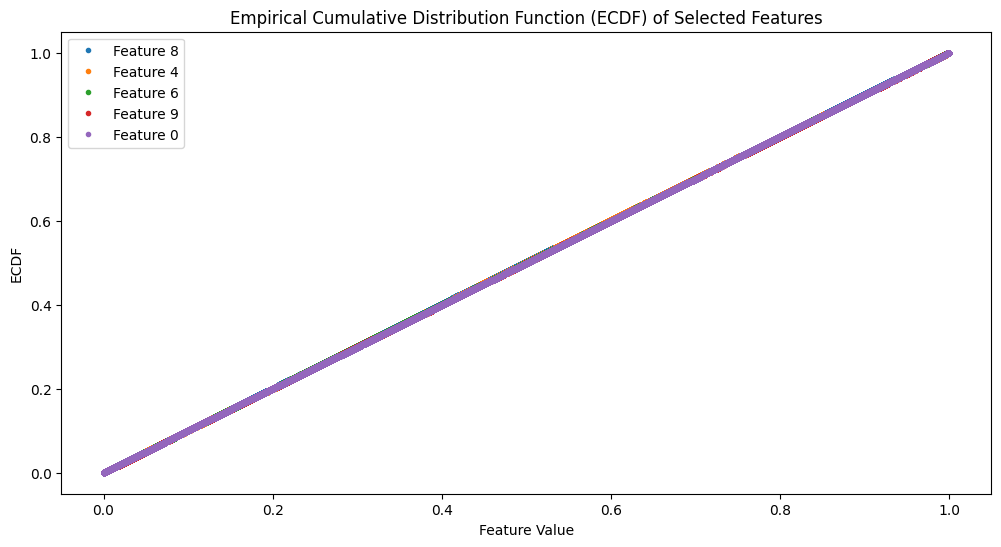

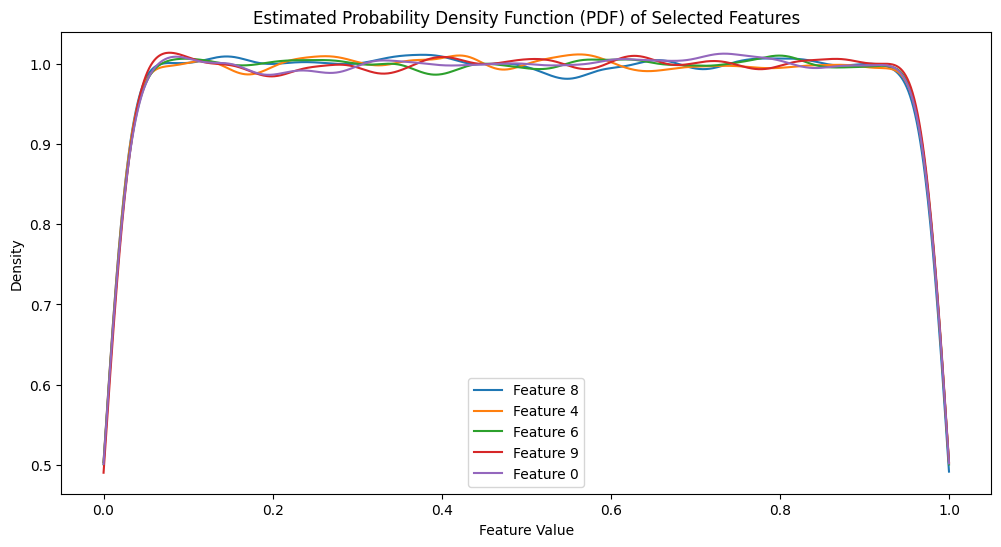

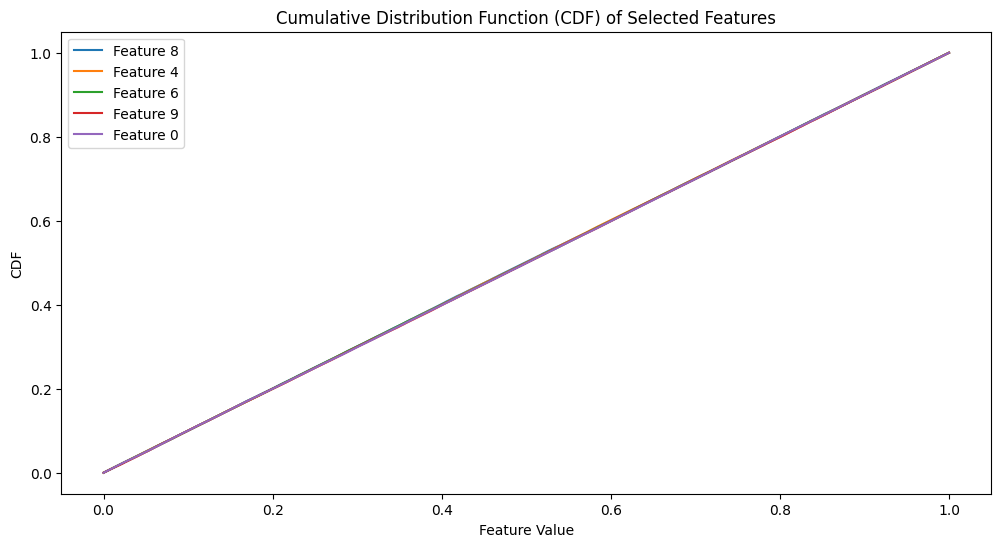

In [36]:
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde

# Compute ECDF (Empirical Cumulative Distribution Function)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

# Select important features for analysis
selected_features = [8, 4, 6, 9, 0]

plt.figure(figsize=(12, 6))

# Compute and plot ECDF for selected features
for feature in selected_features:
    x, y = ecdf(X.iloc[:, feature])
    plt.plot(x, y, marker='.', linestyle='none', label=f"Feature {feature}")

plt.title("Empirical Cumulative Distribution Function (ECDF) of Selected Features")
plt.xlabel("Feature Value")
plt.ylabel("ECDF")
plt.legend()
plt.show()

# Compute Probability Density Function (PDF) using Kernel Density Estimation (KDE)
plt.figure(figsize=(12, 6))
for feature in selected_features:
    kde = gaussian_kde(X.iloc[:, feature])
    x_vals = np.linspace(min(X.iloc[:, feature]), max(X.iloc[:, feature]), 1000)
    plt.plot(x_vals, kde(x_vals), label=f"Feature {feature}")

plt.title("Estimated Probability Density Function (PDF) of Selected Features")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Compute and plot CDF (Cumulative Distribution Function)
plt.figure(figsize=(12, 6))
for feature in selected_features:
    x, y = ecdf(X.iloc[:, feature])
    plt.plot(x, y, label=f"Feature {feature}")

plt.title("Cumulative Distribution Function (CDF) of Selected Features")
plt.xlabel("Feature Value")
plt.ylabel("CDF")
plt.legend()
plt.show()
